# Objectives:
## 1. Build a machine learning model to identify fraudulent credit card transactions.
## 2. Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
## 3. Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
## 4. Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

# Downloading the dataset

In [ ]:
%pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 62% 41.0M/66.0M [00:00<00:00, 223MB/s]
100% 66.0M/66.0M [00:00<00:00, 232MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip -d /content/

Archive:  /content/creditcardfraud.zip
  inflating: /content/creditcard.csv  


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Reading & Understanding the data

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Checking for missing data

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### The dataset exhibits a significant class imbalance, with the majority of transactions labeled as non-fraudulent.
### If we were to build our predictive models and conduct our analysis using this dataset as-is, we would likely encounter several challenges including the problem of overfitting, leading to inaccurate results.

Text(0.5, 1.0, 'Class Distributions')

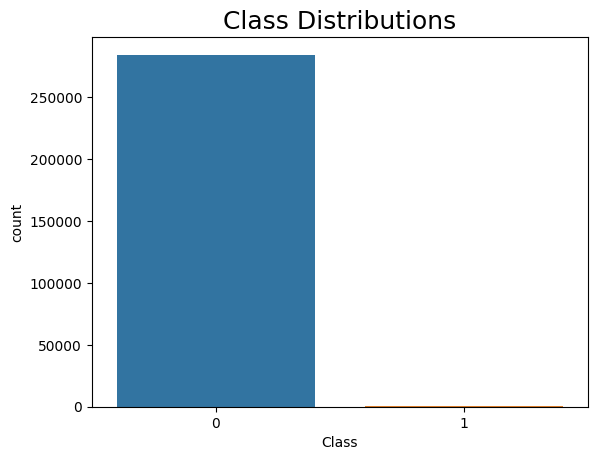

In [ ]:
sns.countplot(data=data, x = 'Class')
plt.title('Class Distributions', fontsize=18)

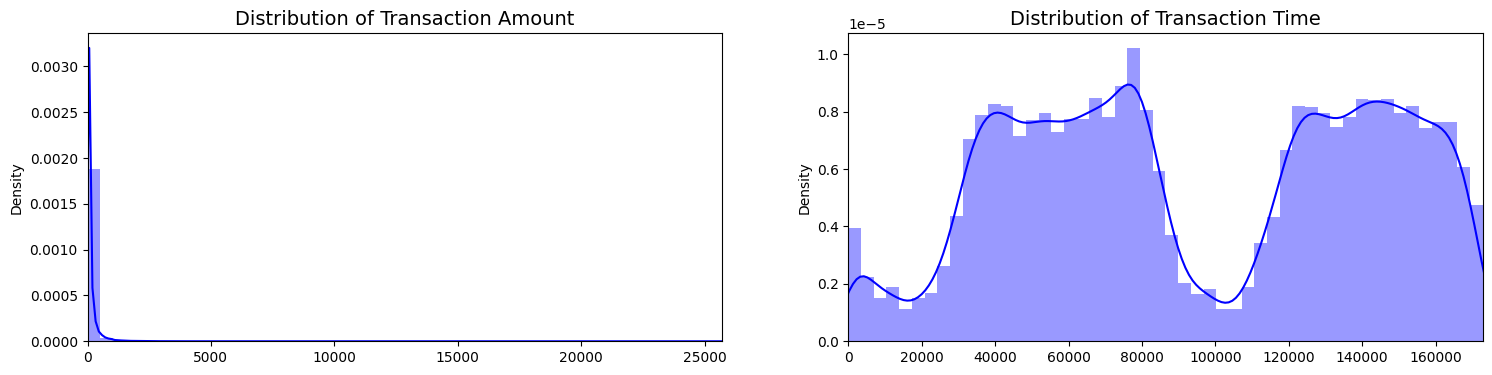

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

# Scaling & Pre-processing Data

## Robust Scalar
### RobustScaler is a data preprocessing technique to scale and normalize features (variables) in a dataset in a way that is robust to the presence of outliers.

## Here's how RobustScaler works:

1. Centering: RobustScaler first centers the data by subtracting the median from each data point. Centering helps address the problem of skewness that can be caused by outliers.

2. Scaling: After centering, RobustScaler scales the data by dividing each data point by the interquartile range (IQR). The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

# Formula :- Scaled value = (X - Median) / IQR

In [ ]:
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

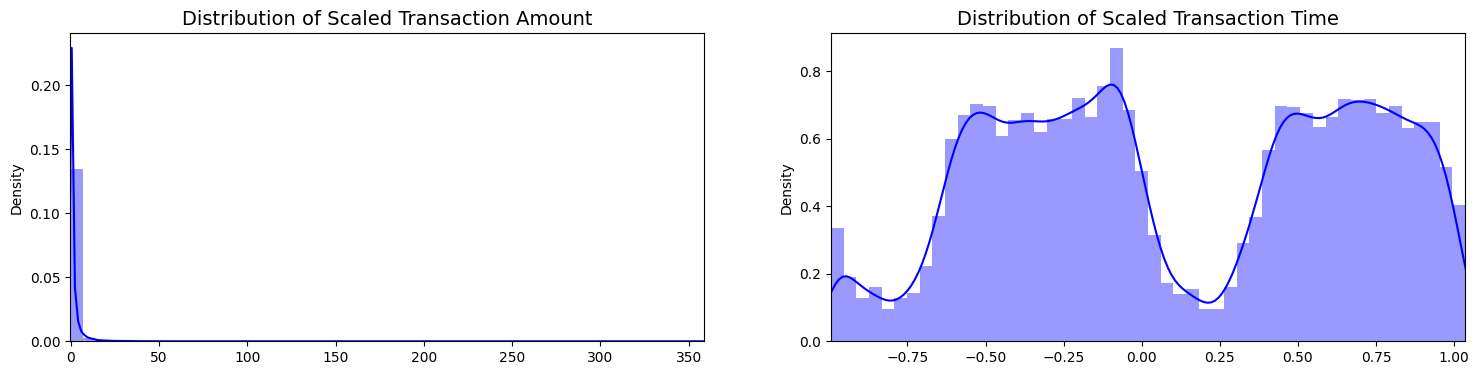

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['scaled_amount'].values
time_val = data['scaled_time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Scaled Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [ ]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Splitting the Data

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

stratified_splitter = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in stratified_splitter.split(X, y):
    train_X, test_X = X.iloc[train_index], X.iloc[test_index]
    train_y, test_y = y.iloc[train_index], y.iloc[test_index]

train_X = train_X.values
test_X = test_X.values
train_y = train_y.values
test_y = test_y.values

train_labels, train_label_counts = np.unique(train_y, return_counts=True)
test_labels, test_label_counts = np.unique(test_y, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_label_counts / len(train_y))
print(test_label_counts / len(test_y))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


# Random Under-Sampling:

### Using "Random Under-Sampling" technique, it can address class imbalance in the dataset and prevent model overfitting.
### Here are the key steps:

### 1. Assess Imbalance: We start by quantifying the class imbalance using the 'value_counts()' method on the class column. (Done at an earlier phase)

### 2. Balance the Dataset: Our goal is to create a balanced dataset with an equal number of fraud (492 cases) and non-fraud transactions. We achieve this balance by reducing the number of non-fraudulent cases.

### 3. Shuffle Data: To ensure consistent model performance, we shuffle the sub-sampled data.

### However, it's important to note that "Random Under-Sampling" comes with a trade-off of significant information loss due to the drastic reduction in non-fraudulent transactions from 284,315 to 492.

In [ ]:
data = data.sample(frac=1)

fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
239359,0.055754,0.768066,-0.299711,1.079933,-0.500521,-0.571127,1.362166,-0.241336,1.061852,-0.055889,...,0.178838,-0.008621,0.287652,-0.302456,-0.025240,-0.037041,0.588618,0.369017,0.266397,0
274475,0.250122,0.955556,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,1
66530,4.965276,-0.382958,0.268980,-1.817023,0.621356,0.222473,-0.729796,2.092592,-0.625222,0.723805,...,0.524358,0.156798,-0.027548,-0.126062,-0.935279,-0.356141,1.015872,-0.038061,0.052790,0
248296,-0.307413,0.812780,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
42936,0.526514,-0.509722,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,...,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 239359 to 43061
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  984 non-null    float64
 1   scaled_time    984 non-null    float64
 2   V1             984 non-null    float64
 3   V2             984 non-null    float64
 4   V3             984 non-null    float64
 5   V4             984 non-null    float64
 6   V5             984 non-null    float64
 7   V6             984 non-null    float64
 8   V7             984 non-null    float64
 9   V8             984 non-null    float64
 10  V9             984 non-null    float64
 11  V10            984 non-null    float64
 12  V11            984 non-null    float64
 13  V12            984 non-null    float64
 14  V13            984 non-null    float64
 15  V14            984 non-null    float64
 16  V15            984 non-null    float64
 17  V16            984 non-null    float64
 18  V17

In [ ]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

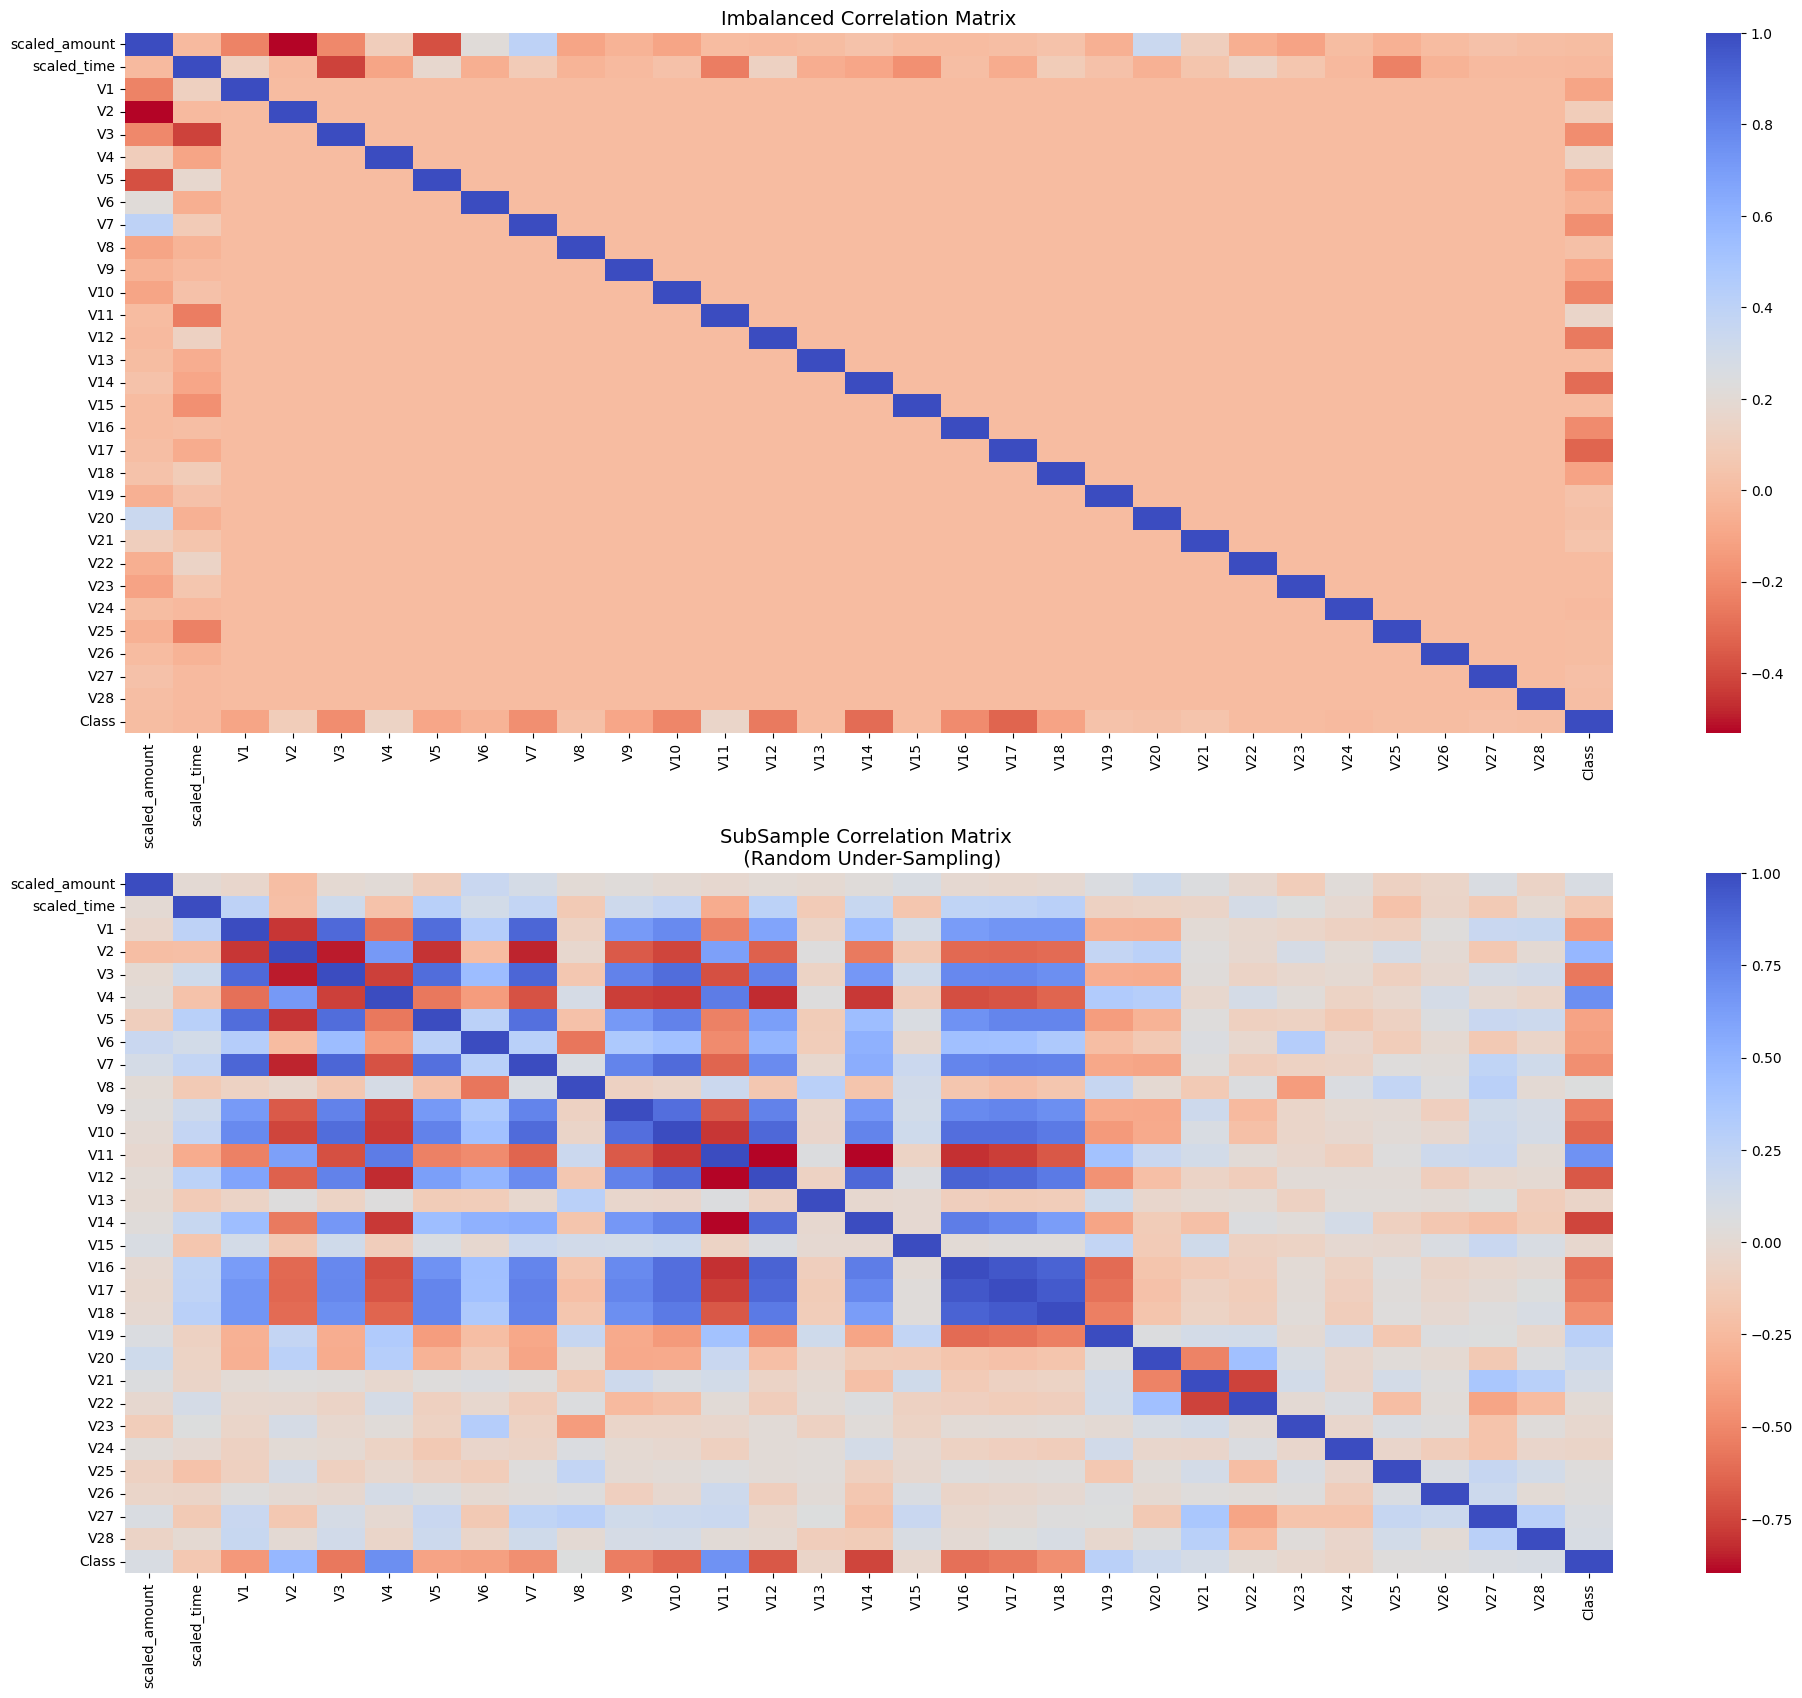

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (Random Under-Sampling)', fontsize=14)
plt.show()

## Insights:-
### 1. Negative Correlations: There is a negative correlation among V17, V14, V12, and V10. It's important to observe that as these values decrease, the likelihood of a transaction being fraudulent increases.

### 2. Positive Correlations: V2, V4, V11, and V19 exhibit positive correlations. Notably, as these values increase, the probability of a transaction being fraudulent also rises.

# Dimensionality Reduction Techniques

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# 1. t-SNE

##    t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique for visualizing high-dimensional data in a lower-dimensional space.
##   Steps:-
##    1. Similarity Measurement: t-SNE calculates similarities between data points in the high-dimensional space.

##    2. Probability Distributions: It constructs probability distributions for both high and low-dimensional spaces, representing data point similarities and their arrangements, respectively.

##    3. Minimizing Divergence: t-SNE minimizes the divergence between these probability distributions by adjusting data point positions in the low-dimensional space.

##    4. Heavy-Tailed Distributions: It uses a heavy-tailed Student's t-distribution to handle outliers and the crowding problem.


In [ ]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# 2. PCA

## PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in statistics and machine learning.

## Steps ;-

##1. Variance Maximization: PCA aims to find the linear combinations of the original features (principal components) that maximize the variance in the data.

##2. Orthogonal Components: The principal components are orthogonal to each other, which means they are uncorrelated and capture different aspects of the data's variance.

##3. Dimension Reduction: PCA allows for reducing the dimensionality of data by selecting a subset of the most significant principal components, often discarding those with low variance.

##4. Eigenvalue Decomposition: PCA involves eigenvalue decomposition of the data's covariance matrix to find the principal components.


In [ ]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

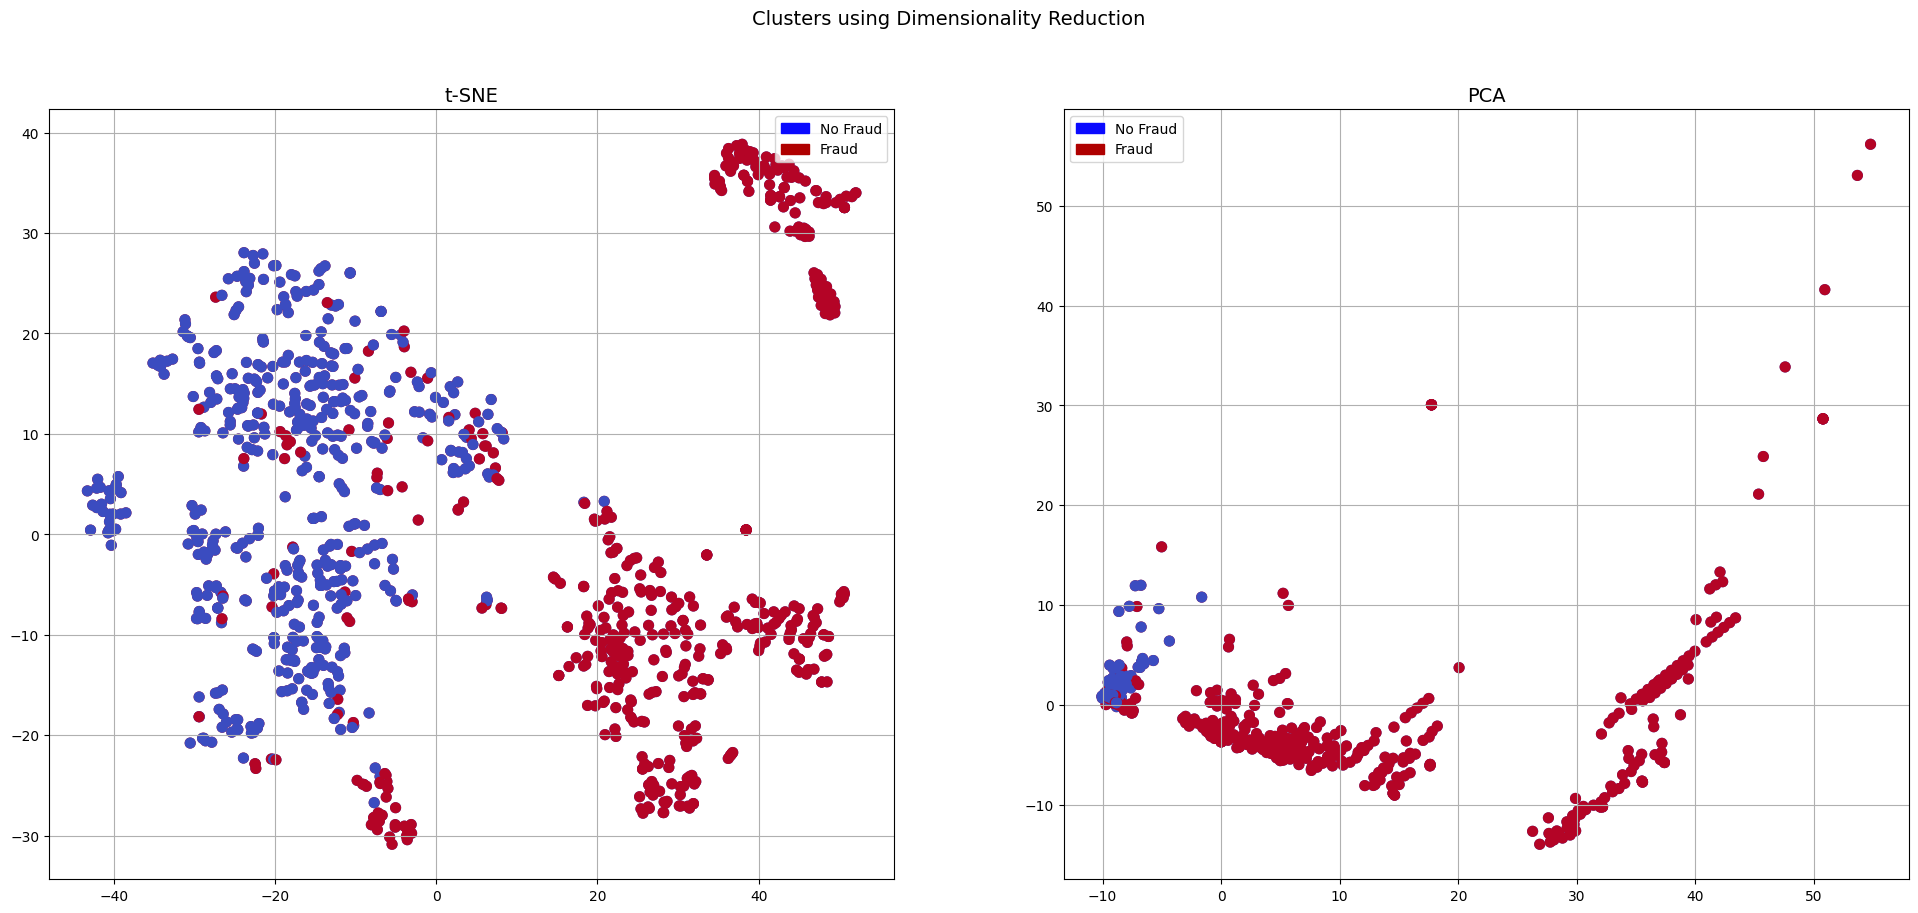

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,10))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# Classifiers (UnderSampling)

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [ ]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.29%
Knears Neighbors Cross Validation Score 93.52%
Support Vector Classifier Cross Validation Score 94.28%
DecisionTree Classifier Cross Validation Score 93.01%


In [ ]:
undersample_X = data.drop('Class', axis=1)
undersample_y = data['Class']

for train_index, test_index in stratified_splitter.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

nm = NearMiss()
X_nearmiss, y_nearmiss = nm.fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

for train, test in stratified_splitter.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(train_X[test], train_y[test]))
    undersample_precision.append(precision_score(train_y[test], undersample_prediction))
    undersample_recall.append(recall_score(train_y[test], undersample_prediction))
    undersample_f1.append(f1_score(train_y[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(train_y[test], undersample_prediction))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [ ]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.977926443022429
KNears Neighbors:  0.9338407342770345
Support Vector Classifier:  0.9767823670092431
Decision Tree Classifier:  0.9277422273931872


In [ ]:
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.94
Precision Score: 0.70
F1 Score: 0.80
Accuracy Score: 0.77
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.62
Precision Score: 0.00
Recall Score: 0.36
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


# SMOTE Technique (Over-Sampling)

## SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(train_X), len(train_y)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(test_X), len(test_y)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' : ['liblinear',] }
for train, test in stratified_splitter.split(train_X, train_y):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(train_X[train], train_y[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(train_X[test])

    accuracy_lst.append(pipeline.score(train_X[test], train_y[test]))
    precision_lst.append(precision_score(train_y[test], prediction))
    recall_lst.append(recall_score(train_y[test], prediction))
    f1_lst.append(f1_score(train_y[test], prediction))
    auc_lst.append(roc_auc_score(train_y[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9426066410860404
precision: 0.06322330446351429
recall: 0.9162934112301201
f1: 0.11643401452148106
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(test_X)
print(classification_report(test_y, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



# SMOTE Technique (OverSampling) After splitting and Cross Validating

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy=0.6)

Xsm_train, ysm_train = sm.fit_resample(train_X, train_y)

In [ ]:
log_reg_sm.fit(Xsm_train, ysm_train)

LogisticRegression()

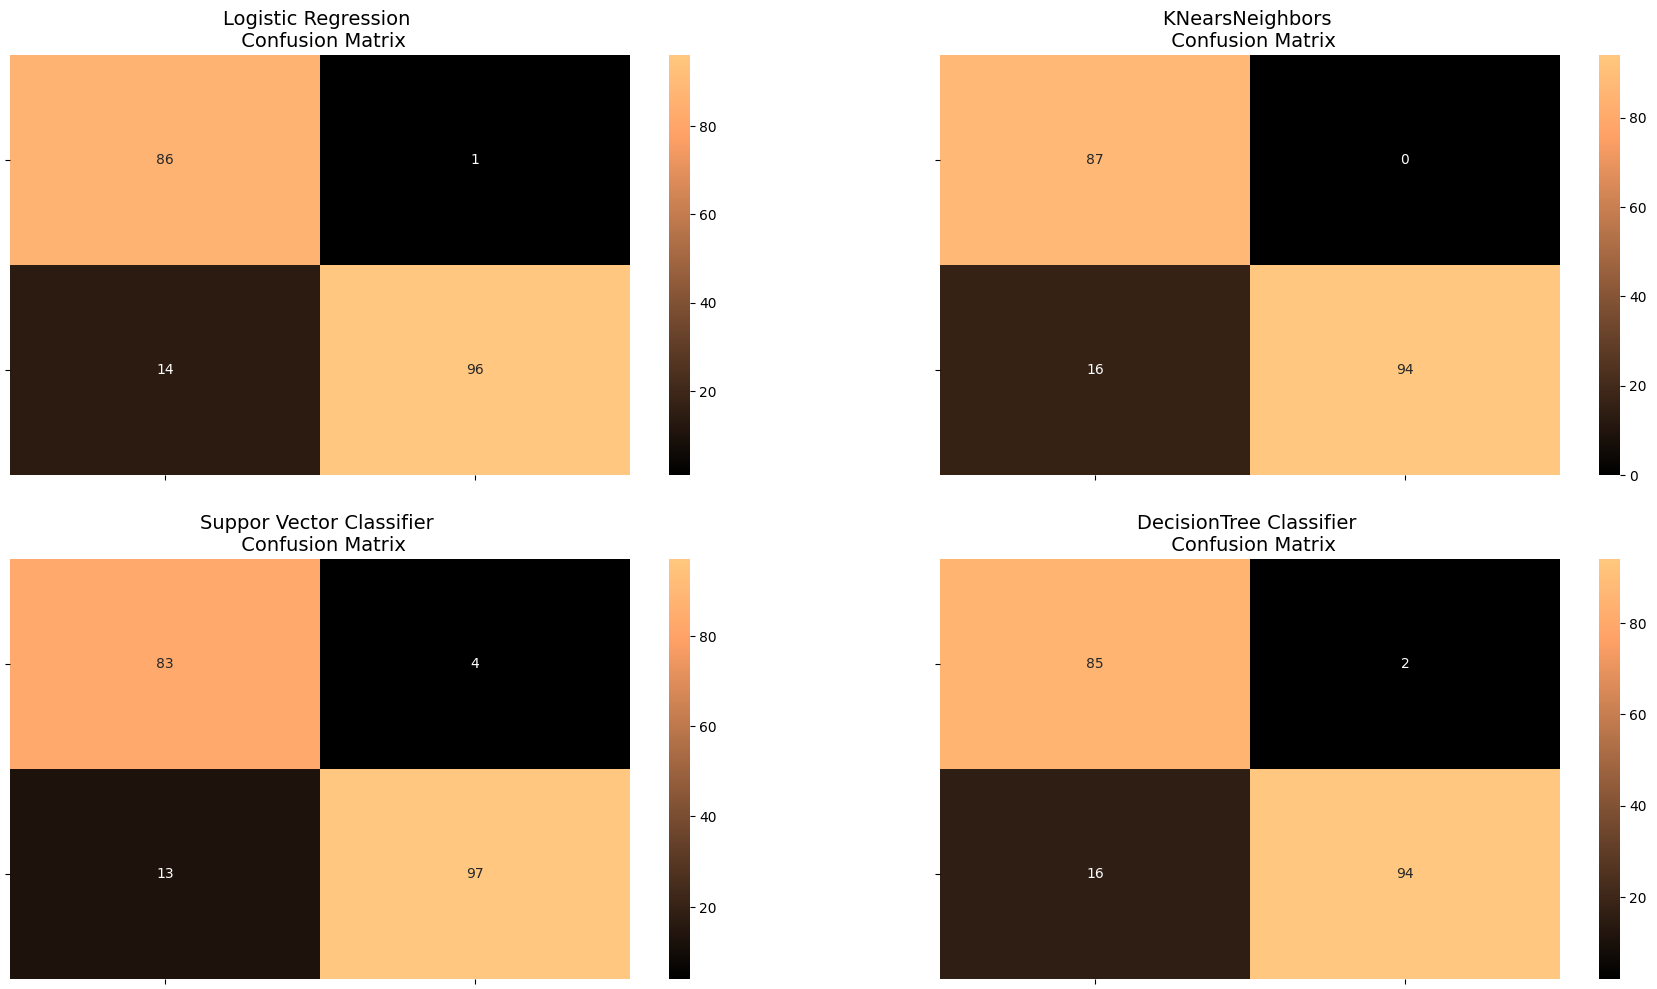

In [ ]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print("-"*100)
print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
print("-"*100)
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print("-"*100)
print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        87
           1       0.99      0.87      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

----------------------------------------------------------------------------------------------------
KNears Neighbors:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        87
           1       1.00      0.85      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

----------------------------------------------------------------------------------------------------
Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.86

# Logistic Regression with Under-Sampling

In [ ]:
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Over-Sampling)

In [ ]:
y_pred_sm = best_est.predict(test_X)
oversample_score = accuracy_score(test_y, y_pred_sm)

# Results

In [ ]:
print('Technique Used : Random UnderSampling')
print('Score :- ', undersample_score)

print('Technique Used : Oversampling (SMOTE)')
print('Score :- ', oversample_score)

Technique Used : Random UnderSampling
Score :-  0.8121827411167513
Technique Used : Oversampling (SMOTE)
Score :-  0.9882024543108443


# Conclusion
## 1. Applying SMOTE to our imbalanced dataset effectively addressed the label imbalance issue, rectifying the disparity between the occurrences of non-fraudulent and fraudulent transactions.

## 2. Furthermore, within our undersampled dataset, our model struggles to accurately identify a significant portion of non-fraudulent transactions, often erroneously categorizing them as fraudulent cases.